In [1]:
# analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./run0000/fiber_force.txt',
                    comment='%',    
                    delim_whitespace=True,
                    names=['identity', 'posX', 'posY', 'forceX', 'forceY', 'tension'])

In [3]:
df.head()

,identity,posX,posY,forceX,forceY,tension
0,1,-1.5347,2.4052,0.0000,0.0000,-0.0246
1,1,-1.0741,2.2106,0.0000,0.0000,-0.0491
2,1,-0.6136,2.0158,-0.0368,0.1022,0.0000
3,2,-0.0299,2.8294,0.0000,0.0000,0.0799
4,2,-0.3226,2.4240,0.0000,0.0000,0.1599


In [4]:
df['tension_abs'] = abs(df['tension'])

In [6]:
mean_tension = np.mean(df.groupby(['identity'])['tension_abs'].mean())

In [2]:
mean_tension = []
for i in range(9):
    filename = './run000{}/fiber_force.txt'.format(i)
    df = pd.read_csv(filename,
                    comment='%',    
                    delim_whitespace=True,
                    names=['identity', 'posX', 'posY', 'forceX', 'forceY', 'tension'])
    df['tension_abs'] = abs(df['tension'])
    mean_tension.append(np.mean(df.groupby(['identity'])['tension_abs'].mean()))

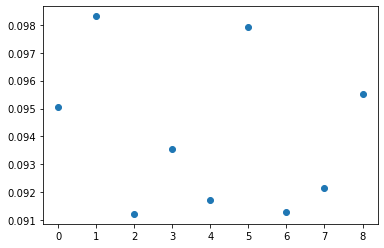

In [4]:
fig, ax = plt.subplots()
ax.scatter(np.arange(9), mean_tension)
plt.show()